In [1]:
from gridEnv import Grid;
import numpy as np;


Environment at time 3
|. . . . .|
|. . . T .|
|C . . . .|

Policy
|↓ ← ← ↑ ↓|
|→ ← → ↓ ↑|
|← ↓ ↑ ↓ ↑|

Value


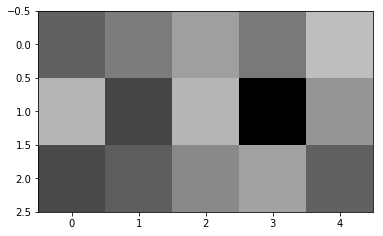

[[-0.24 -0.03  0.24 -0.05  0.49]
 [ 0.42 -0.45  0.42 -1.    0.17]
 [-0.42 -0.27  0.07  0.27 -0.24]]
(False, -1)


In [8]:
from IPython.display import clear_output
from time import sleep;
g = Grid(length=3,width=5,start=(0,0),terminals=[(1,3)]);
for i in range(4):
    g.displayAll()
    print (g.step(3))
    sleep(1);
    clear_output(wait=True)


# Monte-Carlo Learning vs TD Learning
